# CarND-Behavioral-Cloning-P3

## 数据预处理

In [ ]:
import cv2
import numpy as np
import pandas as pd
df = pd.read_csv('driving_log.csv',skipinitialspace=True)
df = df.values

#image
img_height, img_width = 160,320
img_1=[np.zeros((img_height, img_width, 3), dtype=np.uint8) for i in range(len(df))]
img_2=[np.zeros((img_height, img_width, 3), dtype=np.uint8) for i in range(len(df))]
img_3=[np.zeros((img_height, img_width, 3), dtype=np.uint8) for i in range(len(df))]
for i in range(len(df)):
    img_1[i] = cv2.imread(df[i][0])
    img_2[i] = cv2.imread(df[i][1])
    img_3[i] = cv2.imread(df[i][2])
img_1 = np.array(img_1)
img_2 = np.array(img_2)
img_3 = np.array(img_3)

#labels
label_1=np.zeros((len(df),1),dtype=np.float32)
label_2=np.zeros((len(df),1),dtype=np.float32)
label_3=np.zeros((len(df),1),dtype=np.float32)
label_4=np.zeros((len(df),1),dtype=np.float32)
for i in range(len(df)):
    label_1[i] = df[i][3]
    label_2[i] = df[i][4]
    label_3[i] = df[i][5]
    label_4[i] = df[i][6]

##shuffle    
p = np.random.permutation(len(img_1))
img_1,img_2,img_3,label_1,label_2,label_3,label_4=img_1[p],img_2[p],img_3[p],label_1[p],label_2[p],label_3[p],label_4[p]

##split
index = int(0.9*len(df))
img_train = [img_1[:index],img_2[:index],img_3[:index]]
img_test = [img_1[index:],img_2[index:],img_3[index:]]
labels_train = [label_1[:index], label_2[:index], label_3[:index], label_4[:index]]
labels_test = [label_1[index:], label_2[index:], label_3[index:], label_4[index:]]

## 可视化

In [2]:
print(img_train[0].shape, labels_train[0].shape)
print(img_test[0].shape, labels_test[0].shape)


(7232, 160, 320, 3) (7232, 1)
(804, 160, 320, 3) (804, 1)


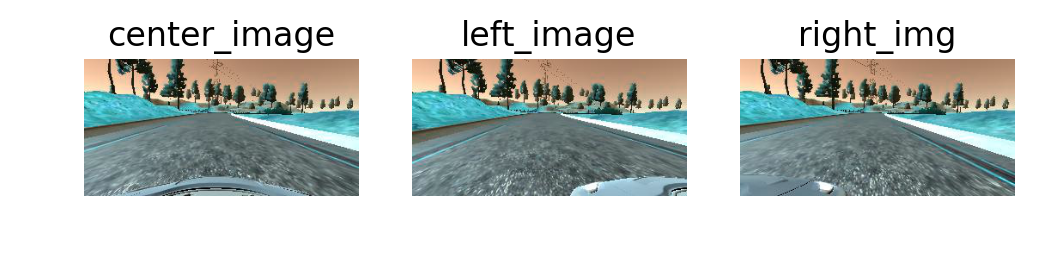

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import random

index = random.randint(0, int(0.1*len(df)))
title = ['center_image','left_image','right_img']
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    plt.imshow(img_test[i][index])
    plt.axis('off')
#plt.title(title)
#plt.imshow(img_test[index])

## 构建模型

In [6]:
from keras.models import Model
from keras.optimizers import RMSprop,SGD
from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard
from keras.layers import Input, Convolution2D, MaxPooling2D, Flatten, Dropout, Dense, merge
##model_0
input = Input(shape=(img_height,img_width,3)) 

x = Convolution2D(20,3,3,border_mode='same',activation='relu')(input)                                            
x = Convolution2D(20,3,3,border_mode='same',activation='relu')(x)                       
x = MaxPooling2D((2, 2), border_mode='same')(x)                         

#x = Convolution2D(32,3,3,border_mode='same',activation='relu')(x)                
#x = Convolution2D(32,3,3,border_mode='same',activation='relu')(x)
#x = MaxPooling2D((2, 2), border_mode='same')(x)                           

x = Convolution2D(40,3,3,border_mode='same',activation='relu')(x)                      
x = Convolution2D(40,3,3,border_mode='same',activation='relu')(x) 
x = MaxPooling2D((2, 2), border_mode='same')(x)  

#x = Convolution2D(128,5,5,border_mode='same',activation='relu')(x)                   
#x = Convolution2D(128,1,1,border_mode='same',activation='relu')(x) 
#x = MaxPooling2D((2, 2), border_mode='same')(x)

#x = Convolution2D(256,5,5,border_mode='same',activation='relu')(x)                       
#x = Convolution2D(256,1,1,border_mode='same',activation='relu')(x) 
#x = MaxPooling2D((2, 2), border_mode='same')(x)  
out=Flatten()(x)
model_0 = Model(input=input,output=out)

input_1 = Input(shape=(img_height,img_width,3),name='input_1')
input_2 = Input(shape=(img_height,img_width,3),name='input_2')
input_3 = Input(shape=(img_height,img_width,3),name='input_3')

o_1 = model_0(input_1)
o_2 = model_0(input_2)
o_3 = model_0(input_3)
out = merge([o_1, o_2, o_3])
out = Dense(1024,activation='relu')(out)
out = Dense(512,activation='relu')(out)
out = Dropout(0.85)(out)
output = Dense(1)(out)
#output_2 = Dense(1)(out)
#output_3 = Dense(1)(out)
#output_4 = Dense(1)(out)

model = Model(input=[input_1,input_2,input_3],output=output)
#model=Model(input,output)


In [7]:
opt = RMSprop(lr=1e-6)
model.compile(optimizer=opt,
              loss='mse')

model.fit(img_train,labels_train[0],validation_split=0.15,batch_size=16, callbacks=[TensorBoard(log_dir='./log')])
model.evaluate(img_test, labels_test[0])

Train on 6147 samples, validate on 1085 samples
Epoch 1/10
6147/6147 [==============================] - 200s - loss: 0.2244 - val_loss: 0.0151
Epoch 2/10
6147/6147 [==============================] - 196s - loss: 0.0244 - val_loss: 0.0140
Epoch 3/10
6147/6147 [==============================] - 196s - loss: 0.0196 - val_loss: 0.0142
Epoch 4/10
6147/6147 [==============================] - 196s - loss: 0.0171 - val_loss: 0.0124
Epoch 5/10
6147/6147 [==============================] - 196s - loss: 0.0158 - val_loss: 0.0151
Epoch 6/10
6147/6147 [==============================] - 196s - loss: 0.0153 - val_loss: 0.0143
Epoch 7/10
6147/6147 [==============================] - 196s - loss: 0.0146 - val_loss: 0.0115
Epoch 8/10
6147/6147 [==============================] - 196s - loss: 0.0142 - val_loss: 0.0108
Epoch 9/10
6147/6147 [==============================] - 196s - loss: 0.0139 - val_loss: 0.0111
Epoch 10/10
804/804 [==============================] - 7s     


0.0096038183595855437

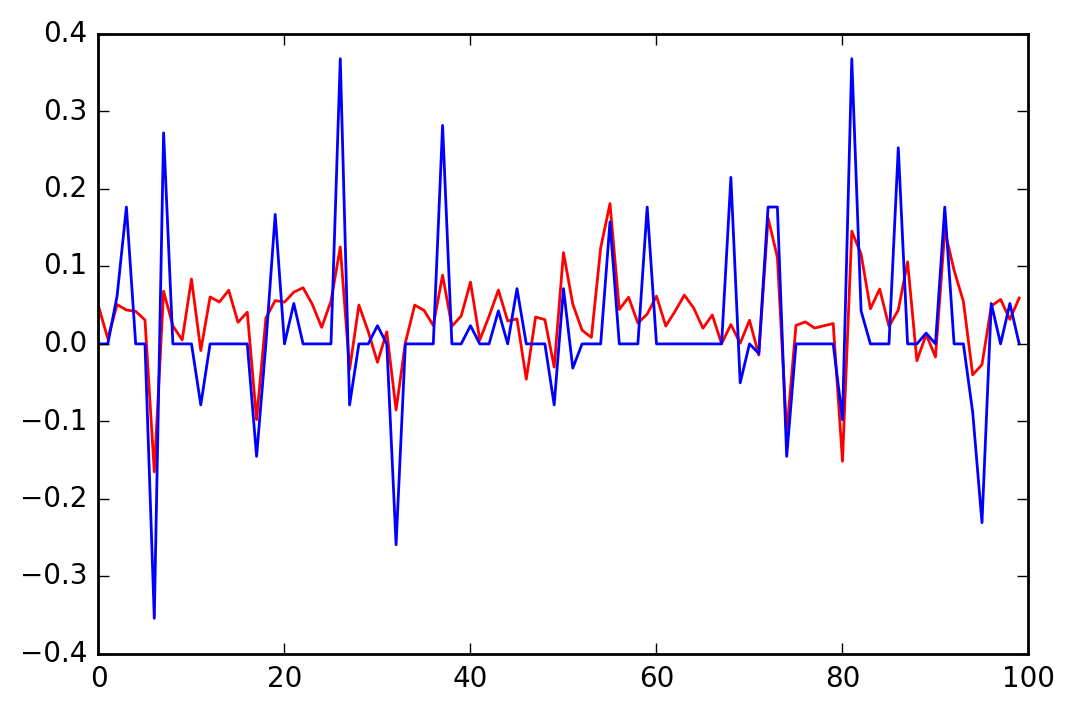

In [8]:
pred = model.predict([img_test[i][100:200]for i in range(3)])
plt.plot(pred,'r')
plt.plot(labels_test[0][100:200],'b')
plt.show()

In [9]:
model.save('model.h5')
with open('model.json', 'w') as f:
    f.write(model.to_json())
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 160, 320, 3)   0                                            
____________________________________________________________________________________________________
input_2 (InputLayer)             (None, 160, 320, 3)   0                                            
____________________________________________________________________________________________________
input_3 (InputLayer)             (None, 160, 320, 3)   0                                            
____________________________________________________________________________________________________
model_3 (Model)                  (None, 128000)        25860       input_1[0][0]                    
                                                                   input_2[0][0]           

In [ ]:
from keras.models import load_model
model = load_model('model_final.h5')

In [6]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot,plot
plot(model, to_file='model.png',show_shapes=True)
SVG(model_to_dot(model,1).create(prog='dot', format='svg'))

ImportError: No module named 'pydot'

In [ ]:
model.evaluate(img_test, labels_test[0])

In [ ]:
pred = model.predict([img_test[i][100:200]for i in range(3)])
plt.plot(pred,'r')
plt.plot(labels_test[0][100:200],'b')
plt.show()